### Basic Logistic Regression with Lists

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
x = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [[0],[1],[0],[1],[0],[1],[0],[1],[0],[1]]

In [3]:
model = LogisticRegression(solver='liblinear')
model.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='liblinear')

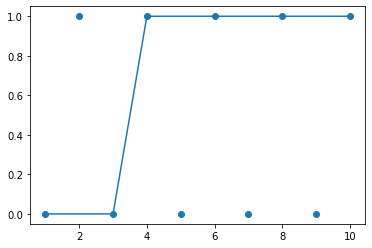

In [4]:
plt.scatter(x, y)
plt.plot(x, model.predict(x))
plt.show() 

In [5]:
pred = model.predict([[12]])[0]
print(pred) 
pred = model.predict([[11]])[0]
print(pred) 

1
1


### Bayesian Logistic Regression using Pandas

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [7]:
data = pd.read_csv('datasets/lr_data.csv')

X = data.iloc[:, 0].values.reshape(-1, 1) 
Y = data.iloc[:, 1].values.reshape(-1, 1) 
Y = [int(y) for y in Y]
clf = LogisticRegression(solver='liblinear')
clf.fit(X, Y)
Y_pred = clf.predict(X)

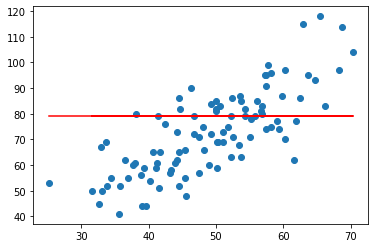

In [8]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

### Bayesian Logistic Regression on Images

In [9]:
import os, cv2
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [10]:
data = []
labels = []
path1 = "datasets/dogs-vs-cats/cats/"
random.shuffle(os.listdir(path1))
for imagepaths in tqdm(os.listdir(path1)[:300]):
    imagepath = path1 + imagepaths
    image = cv2.imread(imagepath)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64)).flatten()
    data.append(image)
    labels.append(0) 

path2 = "datasets/dogs-vs-cats/dogs/"
random.shuffle(os.listdir(path2))
for imagepaths in tqdm(os.listdir(path2)[:300]):
    imagepath = path2 + imagepaths
    image = cv2.imread(imagepath)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64)).flatten()
    data.append(image)
    labels.append(1) 

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 627.63it/s]


In [11]:
data = np.array(data)
labels = np.array(labels)

In [12]:
print(f"Length of Dog images are : {sum(labels)}")
print(f"Length of Cat images are : {len(labels) - sum(labels)}")

Length of Dog images are : 300
Length of Cat images are : 300


In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.30, shuffle=True)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(420, 12288) (180, 12288) (420,) (180,)


In [ ]:
clf = LogisticRegression(solver='saga')
clf.fit(xtrain, ytrain)

In [ ]:
from sklearn.metrics import accuracy_score

ypred = clf.predict(xtest)

ypred = (ypred > 0.5)
acc = accuracy_score(ytest, ypred)
print(acc)

In [ ]:
import matplotlib.pyplot as plt

ypred1 = clf.predict_proba([xtest[0]])[0]
print(ypred1)
if ypred1[1] > ypred1[0]:
    label1 = 'Predicted Label: Dog'
else:
    label1 = 'Predicted Label: Cat'
    
ypred2 = clf.predict_proba([xtest[59]])[0]
print(ypred2)
if ypred2[1] > ypred2[0]:
    label2 = 'Predicted Label: Dog'
else:
    label2 = 'Predicted Label: Cat'

image1 = xtest[0].reshape(64,64,3)
image2 = xtest[59].reshape(64,64,3)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(image1)
ax.set_title(label1)

ax = fig.add_subplot(1, 2, 2)
plt.imshow(image2)
ax.set_title(label2)

### Bayesian Logistic Regression for NLP

In [ ]:
import os,re
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_excel("datasets/movie_review.xlsx")
df.head()

In [ ]:
X = df["Reviews"][:2500]
y = df["Sentiment"][:2500]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.32, shuffle=True)

In [ ]:
%%time
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = (y_pred > 0.5)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

In [ ]:
def text_pred(text):
    text = cv.transform([text]).toarray()
    pred = model.predict(text)
    preds = 0
    if pred > 0.5:
        preds = 1
    print(pred)
    label = le.inverse_transform([preds])[0]
    return label

In [ ]:
text_pred("This movie sucks and the plot twist was already known")

In [ ]:
text_pred("Nice movie and the actions are so good")